# 3.2 - Logistic Regression no MNIST

Notebook gerado a partir do arquivo original, com as seguintes alterações solicitadas:

1. Inserir código no laço de treinamento para que, ao final de cada época, sejam impressos:
   - número da época,
   - valor da perda (loss),
   - acurácia.
2. Inserir código no laço de treinamento para visualização dos valores dos gradientes referentes à classe do dígito **4** no final de cada época.

A implementação abaixo usa PyTorch e o dataset MNIST, pronta para ser executada no Google Colab.


## Preparação

Nesta seção são feitos os imports principais e definida a semente aleatória.
_(Estrutura semelhante ao notebook original.)_


In [1]:

# Regressão Softmax (Logistic Regression) no MNIST
# Implementação focada nos exercícios:
# 1) Imprimir época, perda (loss) e acurácia.
# 2) Visualizar gradientes da classe do dígito 4 no final de cada época.

import torch
from torch import nn, optim
from torch.autograd import Variable
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

torch.manual_seed(1234)


## Dataset MNIST

Carregamos o conjunto de treino do MNIST, normalizamos os pixels para o intervalo [0,1]
e selecionamos um subconjunto de exemplos para acelerar o treinamento.


In [2]:

# Carregando o dataset MNIST

transform = transforms.Compose([
    transforms.ToTensor()
])

train_dataset = datasets.MNIST(root='./data',
                               train=True,
                               transform=transform,
                               download=True)

# Para treinar mais rápido em aula, usaremos apenas um subconjunto (ex.: 2000 amostras).
# Você pode aumentar esse número se quiser treinar por mais tempo.
n_samples_train = 2000
x_train = train_dataset.data[:n_samples_train].float() / 255.0   # normaliza para [0,1]
y_train = train_dataset.targets[:n_samples_train]

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("Valores mínimo e máximo dos pixels:", x_train.min().item(), x_train.max().item())


100%|██████████| 9.91M/9.91M [00:00<00:00, 37.6MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.07MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 9.53MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.06MB/s]

x_train shape: torch.Size([2000, 28, 28])
y_train shape: torch.Size([2000])
Valores mínimo e máximo dos pixels: 0.0 1.0


## Visualização do Dataset

Visualização de algumas imagens do MNIST para conferir se o carregamento foi realizado corretamente.


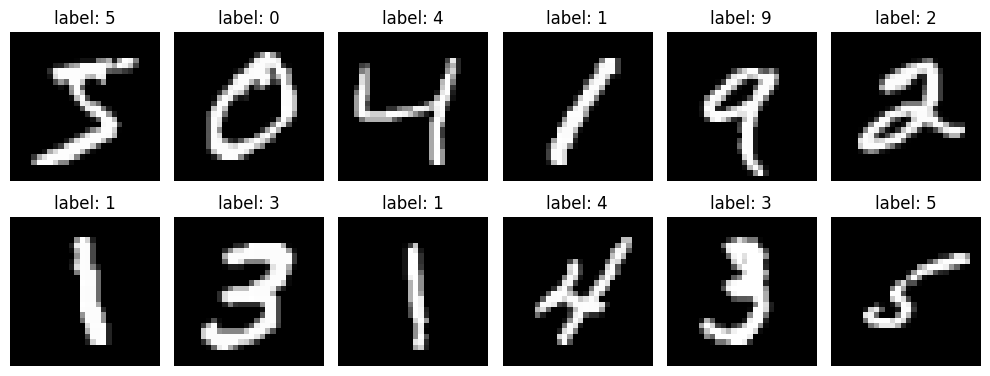

In [3]:

# Visualizando algumas imagens do MNIST (apenas para conferência)

n_show = 12
fig, axes = plt.subplots(2, 6, figsize=(10,4))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(x_train[i].numpy(), cmap='gray')
    ax.set_title(f"label: {y_train[i].item()}")
    ax.axis('off')
plt.tight_layout()
plt.show()


## Modelagem

Definição do modelo de Regressão Logística (camada linear 784→10) equivalente ao do notebook original.


In [4]:

# Definição do modelo: regressão logística (softmax) com camada linear
# 28x28 = 784 atributos de entrada, 10 neurônios de saída (dígitos 0 a 9)

input_dim = 28*28
num_classes = 10

model = nn.Linear(input_dim, num_classes)

print("Peso inicial (shape):", model.weight.data.shape)
print("Bias inicial (shape):", model.bias.data.shape)


Peso inicial (shape): torch.Size([10, 784])
Bias inicial (shape): torch.Size([10])


## Função de Custo e Otimizador

Uso de `CrossEntropyLoss` como função de custo e `SGD` como otimizador, seguindo o padrão do material.


In [5]:

# Função de perda e otimizador

criterion = nn.CrossEntropyLoss()
learning_rate = 0.5
optimizer = optim.SGD(model.parameters(), lr=learning_rate)


## Treinamento

Nesta seção foram inseridas **as modificações pedidas nos exercícios**:
- Impressão, ao final de cada época, do número da época, da *loss* e da acurácia.
- Captura e impressão dos valores dos **gradientes da classe do dígito 4** ao final de cada época.


In [6]:

# Treinamento da rede
# Exercício 1: imprimir, ao final de cada época, a época, a perda (loss) e a acurácia.
# Exercício 2: visualizar os valores dos gradientes referentes à classe do dígito 4
#              no final de cada época.

epochs = 10  # você pode alterar se quiser

# listas para guardar histórico de loss e acurácia
loss_history = []
acc_history = []

for epoch in range(epochs):
    # achata as imagens para vetores de 784 posições
    inputs = x_train.view(-1, 28*28)  # shape: [n_samples_train, 784]
    targets = y_train                  # shape: [n_samples_train]

    # forward
    outputs = model(inputs)

    # cálculo da função de perda (CrossEntropyLoss)
    loss = criterion(outputs, targets)

    # zera gradientes acumulados
    optimizer.zero_grad()

    # backward: cálculo dos gradientes
    loss.backward()

    # ==== Exercício 2: gradientes da classe 4 ====
    # model.weight.grad tem shape [10, 784]. A linha 4 corresponde à classe "4".
    grad_class4 = model.weight.grad[4].detach().clone()  # copiamos para não perder após o step

    # atualização dos pesos
    optimizer.step()

    # ==== Cálculo da acurácia (Exercício 1) ====
    # A saída de model() são scores (logits). Para prever a classe utilizamos argmax.
    _, predicted = torch.max(outputs, dim=1)
    correct = (predicted == targets).sum().item()
    total = targets.size(0)
    accuracy = correct / total

    # guarda histórico
    loss_history.append(loss.item())
    acc_history.append(accuracy)

    # ==== Impressão ao final de cada época (Exercício 1) ====
    print(f"Época [{epoch+1}/{epochs}] - Loss: {loss.item():.4f} - Acurácia: {accuracy:.4f}")

    # ==== Visualização dos gradientes da classe 4 (Exercício 2) ====
    # Aqui mostramos só os 10 primeiros valores para não poluir demais.
    print("Gradiente da classe 4 (primeiros 10 valores):")
    print(grad_class4[:10])
    print("-"*60)


Época [1/10] - Loss: 2.3279 - Acurácia: 0.1195
Gradiente da classe 4 (primeiros 10 valores):
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
------------------------------------------------------------
Época [2/10] - Loss: 1.8366 - Acurácia: 0.5600
Gradiente da classe 4 (primeiros 10 valores):
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
------------------------------------------------------------
Época [3/10] - Loss: 1.5095 - Acurácia: 0.7175
Gradiente da classe 4 (primeiros 10 valores):
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
------------------------------------------------------------
Época [4/10] - Loss: 1.2901 - Acurácia: 0.7340
Gradiente da classe 4 (primeiros 10 valores):
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
------------------------------------------------------------
Época [5/10] - Loss: 1.1391 - Acurácia: 0.7880
Gradiente da classe 4 (primeiros 10 valores):
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
----------------------------------------------

## Avaliação

Aqui são plotados os gráficos de histórico da loss e da acurácia por época,
permitindo comparar o comportamento do treinamento ao longo do tempo.


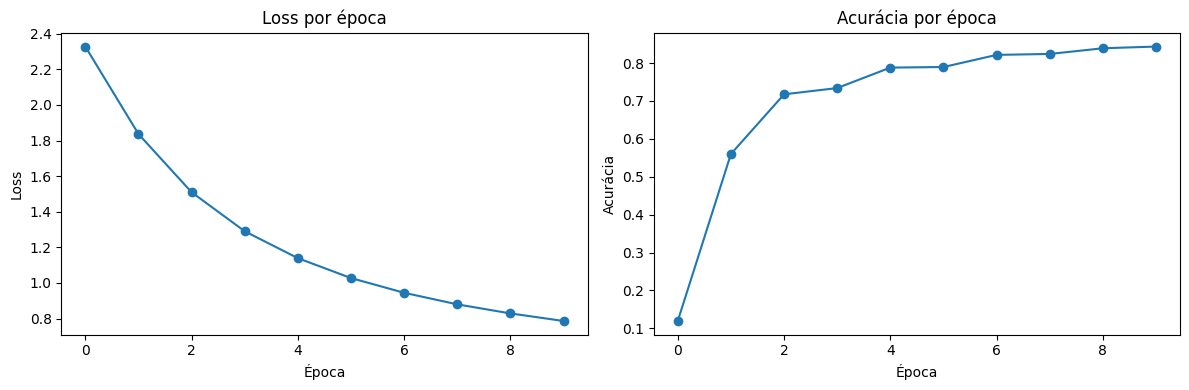

In [7]:

# Gráficos opcionais de histórico de loss e acurácia

fig, ax = plt.subplots(1, 2, figsize=(12,4))

ax[0].plot(loss_history, marker='o')
ax[0].set_title("Loss por época")
ax[0].set_xlabel("Época")
ax[0].set_ylabel("Loss")

ax[1].plot(acc_history, marker='o')
ax[1].set_title("Acurácia por época")
ax[1].set_xlabel("Época")
ax[1].set_ylabel("Acurácia")

plt.tight_layout()
plt.show()
